# Problem Statement

Aim of this exercise is to get initial insights of the Irish flowers dataset and develop a predictor model using Support Vector Classifier.


### Methodology

SVM development is divided into multiple steps as mentioned below,
1. Data exploring and understanding: This step involves preliminary level data understanding and exploring.

2. Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis. 

3. Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.

4. Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type. 

5. Train-test split: This step involves spliting the dataset into train and test parts.

6. Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
    - Model development using default parameters for multi-class problem.
    - Hyper-parameter tuning using GridsearchCV and model development.

7. Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Import Dependancies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import svm

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve

## Reading Dataset

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Data overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Observation,
- Data is having 4 feature columns and 1 class column.
- Data is having 150 entries without any null value.
- Dtype for feature columns is flaot64.

## 1. Data Exploration and Understanding

<AxesSubplot:xlabel='sepal_length'>

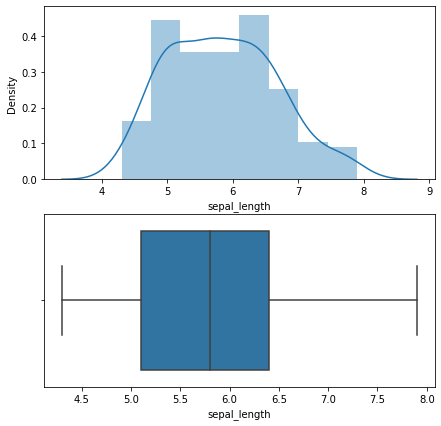

In [5]:
# sepal_length: length of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_length)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_length)

- Sepal length is having range from 4 to 8. 
- The median value for sepal length is 5.8 units. 
- We don't observe any outlier in the sepal length.

<AxesSubplot:xlabel='sepal_width'>

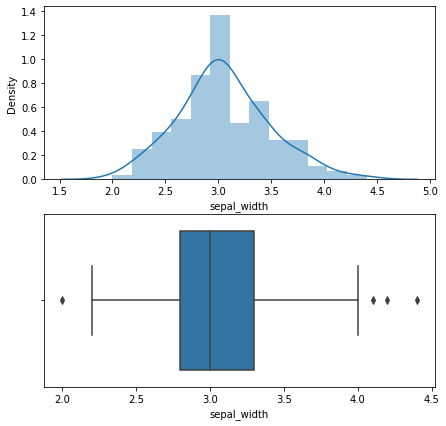

In [6]:
# sepal_width: width of sepal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.sepal_width)
plt.subplot(2,1,2)
sns.boxplot(data.sepal_width)

- Sepal width is having range from 1.5 to 5. 
- The median value for sepal width is 3 units. 
- We can see few outliers in the sepal width on both sides.

<AxesSubplot:xlabel='petal_length'>

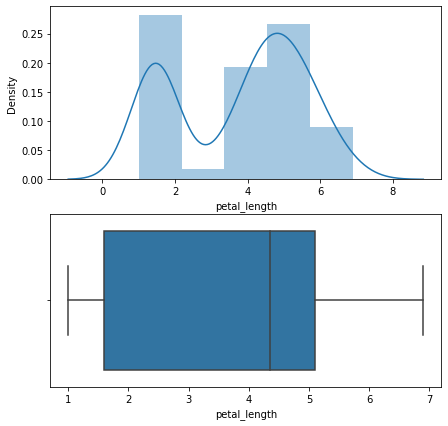

In [7]:
# petal_length: length of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_length)
plt.subplot(2,1,2)
sns.boxplot(data.petal_length)

- petal length is having range from 1.5 to 7.
- The median value for petal length is 4.5 units.
- The distribution of petal length is not normal. 

<AxesSubplot:xlabel='petal_width'>

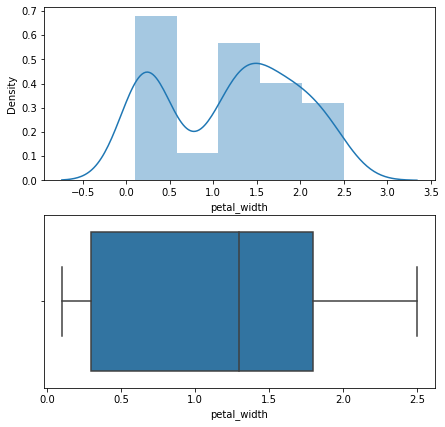

In [8]:
# petal_width: width of petal

plt.subplots(figsize=(7,7))
plt.subplot(2,1,1)
sns.distplot(data.petal_width)
plt.subplot(2,1,2)
sns.boxplot(data.petal_width)

- petal width is having range from 0.2 to 2.5.
- The median value for petal width is 1.3 units.
- The distribution of petal width is not normal.

In [9]:
# Species

data.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

- There are three classes in species variable.
- Class distribution in uniform.

## 2. Data Cleaning

The data is already clean and clear. Hence, we do not need any form of data cleaning step here.

## 3. Data Visualization

<AxesSubplot:>

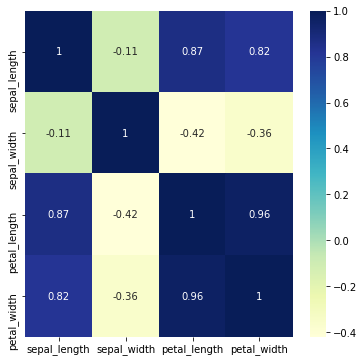

In [10]:
# Pearson's correlation

# heatmap
plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

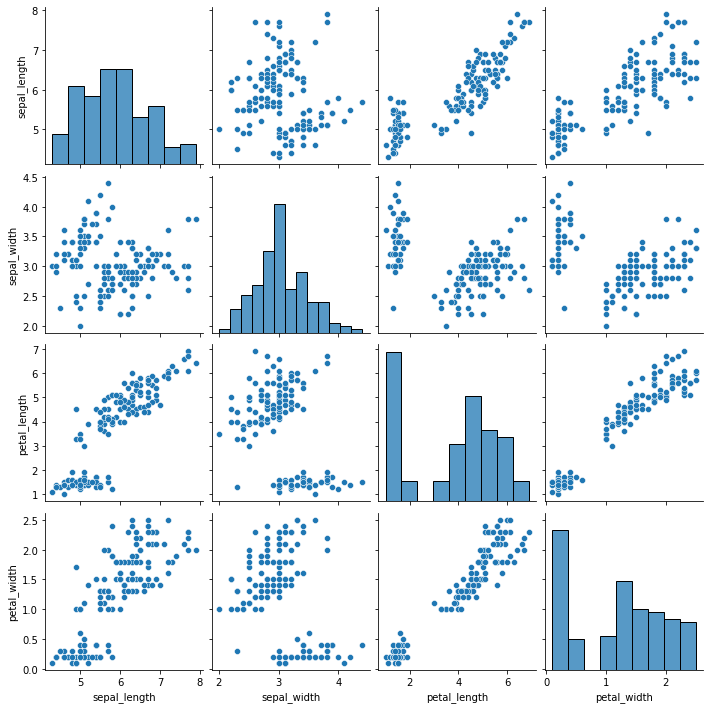

In [11]:
# pairplot: Visualizing scatter plot between numeric columns

sns.pairplot(data)

Observations,
- petal_length and petal_width are having very high correlation of 0.96. We can drop petal_width.
- sepal_width is having negative correlation with sepal_length, petal_length and petal_width.
- Similar correlation can be observed in pairplot as well.

In [12]:
# Dropping 'petal_width'

data = data.drop('petal_width', axis=1)

## 4. Data Preparation

In [13]:
# mapping species column to integer values

data.species = data.species.map({'Iris-virginica': 0, 'Iris-setosa': 1, 'Iris-versicolor': 2})

In [14]:
# splitting into X and y

X = data.drop('species', axis=1)
y = data['species'].astype('int64')

## 5. Train-Test split

In [15]:
# train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

Note: Here are not using 'stratify' parameter of train_test_split function as datset is uniformaly distrubited amongs various classes. This parameters should be used when dataset is having skewed distribution amongs various classes.

#### Scaling the features

In [16]:
# Minmax scaling

# instantiating the scalers
scaler_X = MinMaxScaler()

X_train = pd.DataFrame(scaler_X.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), index=X_test.index, columns=X_test.columns)

## 6. Model Development - Validation and Evaluation

In [17]:
# SVC classifier: using 'ovo' strategy for multiclass problem
# kernel: 'rbf' is radial basis function kernel.

model = svm.SVC(decision_function_shape='ovo')

model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# Making prediction

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#### Accuracy comparison between Train and Test sets

In [19]:
# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.94
Test accuracy: 0.93


It can be observed that both train and test accuracies are almost same. Hence model is performing good on the dataset.

#### Confusion Matrix

Confusion matrix for multiclass classification:

<img src="files/CM.png">

- All the correctly predicted labels would appear along the diagonal of the matrix.
- For successfull classification the confusion matrix should be diagonally sparse.

Text(0.5, 1.0, 'Test set')

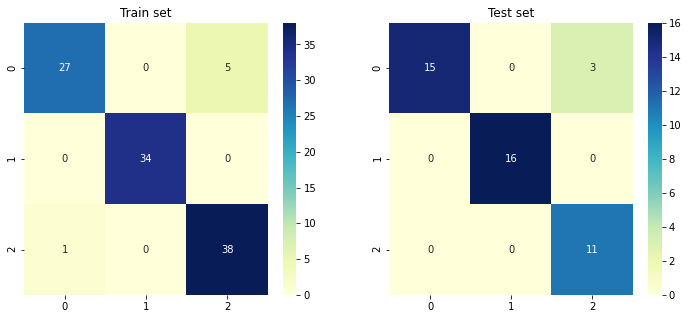

In [20]:
# confusion matrix: train  and test sets

plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax1.set_title('Train set')


ax2 = plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax2.set_title('Test set')

We can observe that,
- confusion matrix for trainset is diagonally sparse. 
- We have only 6 incorrect predictions out 105 train data entries.
- We have only 3 incorrect predictions out 45 test data entries.

#### Classification report

- Classification report shows derived parameters from confusion matrix viz precision, recall, f-score and support(true occurence belong to the class) for each sub-class.
- It also includes corresponding macro and weghted average values as well. 

In [21]:
# classification report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       1.00      1.00      1.00        34
           2       0.88      0.97      0.93        39

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



Observations as per classification report,
- f1-score summarizes both precision and recall scores. f1 values are acceptable for each class.
- macro and weighted average for all the class is ~0.95 which is good.

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       1.00      1.00      1.00        16
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



The above classification report for test data states that there isn't any overfitting with the model. The model is performing really well on the dataset. 

#### Hype-parameter tuning

Hyper-parameter to tune:

C: Regularization parameter and the strength of the regularization is inversely proportional to C
gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Larger value of gamma promotes more curvature in decision boundry.

For choosing C we generally choose the value like 0.001, 0.01, 0.1, 1, 10, 100
and same for Gamma 0.001, 0.01, 0.1, 1, 10, 100


For more reading:
https://medium.com/@myselfaman12345/c-and-gamma-in-svm-e6cee48626be#:~:text=Gamma%20high%20means%20more%20curvature,Gamma%20low%20means%20less%20curvature.&text=C%20is%20a%20hypermeter%20which,weight%20of%20the%20decision%20boundary.


In [23]:
# parameters grid
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

model2 = svm.SVC()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = model2, 
                        param_grid = params, 
                        scoring= 'accuracy',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [24]:
# Checking performance variation with parameter value

cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002699,0.000633,0.002031,0.001577,0.0001,0.0001,"{'C': 0.0001, 'gamma': 0.0001}",0.380952,0.380952,0.380952,...,0.371429,0.019048,30,0.369048,0.369048,0.369048,0.380952,0.369048,0.371429,0.004762
1,0.001751,0.000026,0.000929,0.000020,0.0001,0.0010,"{'C': 0.0001, 'gamma': 0.001}",0.380952,0.380952,0.380952,...,0.371429,0.019048,30,0.369048,0.369048,0.369048,0.380952,0.369048,0.371429,0.004762
2,0.001796,0.000067,0.001090,0.000208,0.0001,0.0100,"{'C': 0.0001, 'gamma': 0.01}",0.380952,0.380952,0.380952,...,0.371429,0.019048,30,0.369048,0.369048,0.369048,0.380952,0.369048,0.371429,0.004762
3,0.001761,0.000091,0.000945,0.000056,0.0001,0.1000,"{'C': 0.0001, 'gamma': 0.1}",0.380952,0.380952,0.380952,...,0.371429,0.019048,30,0.369048,0.369048,0.369048,0.380952,0.369048,0.371429,0.004762
4,0.001762,0.000037,0.000954,0.000054,0.0001,1,"{'C': 0.0001, 'gamma': 1}",0.380952,0.380952,0.380952,...,0.371429,0.019048,30,0.369048,0.369048,0.369048,0.380952,0.369048,0.371429,0.004762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.001621,0.000038,0.000932,0.000038,1000,0.1000,"{'C': 1000, 'gamma': 0.1}",1.000000,0.952381,0.904762,...,0.952381,0.030117,2,0.952381,0.976190,0.964286,0.952381,0.964286,0.961905,0.008909
60,0.001699,0.000083,0.000901,0.000031,1000,1,"{'C': 1000, 'gamma': 1}",1.000000,0.952381,0.857143,...,0.952381,0.052164,2,0.976190,0.988095,0.988095,0.964286,0.976190,0.978571,0.008909
61,0.001754,0.000109,0.000927,0.000071,1000,10,"{'C': 1000, 'gamma': 10}",0.904762,0.952381,0.904762,...,0.933333,0.038095,8,0.988095,1.000000,1.000000,0.988095,0.988095,0.992857,0.005832
62,0.001926,0.000031,0.000906,0.000005,1000,100,"{'C': 1000, 'gamma': 100}",0.809524,0.904762,0.904762,...,0.895238,0.046657,15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


<AxesSubplot:xlabel='param_C', ylabel='mean_test_score'>

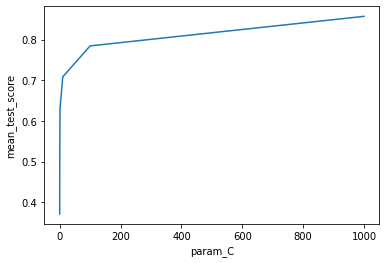

In [25]:
# plotting cv test accuracy Vs C parameter value

# pivot table around param_C
table_C = pd.pivot_table(data = cv_res, values='mean_test_score', index='param_C').reset_index()

sns.lineplot(x=table_C.param_C, y= table_C.mean_test_score)

<AxesSubplot:xlabel='param_gamma', ylabel='mean_test_score'>

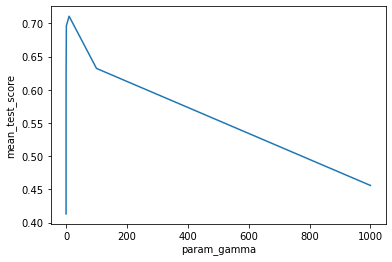

In [26]:
# plotting cv test accuracy Vs gamma parameter value

# pivot table around param_gamma
table_gamma = pd.pivot_table(data = cv_res, values='mean_test_score', index='param_gamma').reset_index()

sns.lineplot(x=table_gamma.param_gamma, y= table_gamma.mean_test_score)

- Higher value of C means less regularization and better CV accuracy.
- CV accuracy increases first and then reduces with Gamma.

In [27]:
# best parameter as per grid search CV

model_cv.best_params_

{'C': 100, 'gamma': 1}

In [28]:
# building model using best parameter values

model3 = svm.SVC(C = model_cv.best_params_['C'],
                 gamma = model_cv.best_params_['gamma'] )

model3.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
# Making prediction

y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

In [30]:
# Accuracy check

print('Train accuracy:', round(accuracy_score(y_train, y_train_pred),2))
print('Test accuracy:', round(accuracy_score(y_test, y_test_pred),2))

Train accuracy: 0.97
Test accuracy: 0.96


Text(0.5, 1.0, 'Test set')

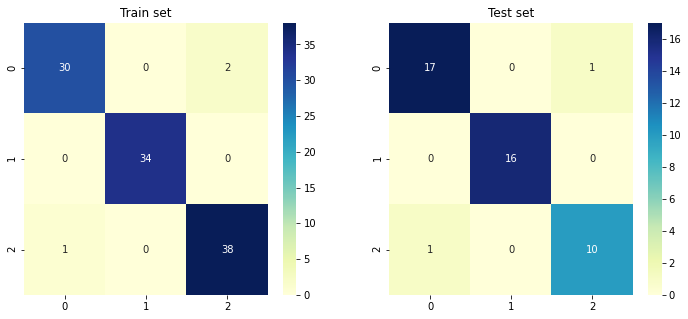

In [31]:
# confusion matrix: train  and test sets

plt.subplots(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax1.set_title('Train set')


ax2 = plt.subplot(1,2,2)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='YlGnBu')
ax2.set_title('Test set')

In [32]:
# classification report: train

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       1.00      1.00      1.00        34
           2       0.95      0.97      0.96        39

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [33]:
# classification report; test

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00        16
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Observation,

- We can see there is considerable improvement in train-test accuracies or other derived matrices after using best parameters from grid search CV. 

## 7. Conclusion

- SVM algorithm is resulting in the ~0.96 accuracy on Iris dataset.
- Precision-recall and f1 score values are near to 0.95.
- SVM algorithm is capable of solving very complex problems (e.g text classification). Hence, getting good performance on Irish dataset is not an eye opener.

------